In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import citipy
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of rando, latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d5f86684cefba064a4d9d453e1fd1a7d


In [6]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")
    
city_weather.json()

City Weather found.


{'cod': '404', 'message': 'city not found'}

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | laguna
Processing Record 2 of Set 1 | isangel
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 1 | telimele
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | corinto
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | kanniyakumari
Processing Record 14 of Set 1 | port lincoln
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 1 | ostrovnoy
Processing Record 19 of Set 1 | mount gambier
Processing Record 20 of Set 1 | faanui
Processing Record 21 of Set 1 | carnarvon
Processing 

Processing Record 36 of Set 4 | rawlins
Processing Record 37 of Set 4 | amderma
City not found. Skipping...
Processing Record 38 of Set 4 | byron bay
Processing Record 39 of Set 4 | strezhevoy
Processing Record 40 of Set 4 | kulhudhuffushi
Processing Record 41 of Set 4 | dax
Processing Record 42 of Set 4 | katsuura
Processing Record 43 of Set 4 | winslow
Processing Record 44 of Set 4 | san ramon
Processing Record 45 of Set 4 | aleksandrovsk-sakhalinskiy
Processing Record 46 of Set 4 | santa fe
Processing Record 47 of Set 4 | ganserndorf
Processing Record 48 of Set 4 | road town
Processing Record 49 of Set 4 | yerbogachen
Processing Record 50 of Set 4 | lompoc
Processing Record 1 of Set 5 | hilo
Processing Record 2 of Set 5 | xiongzhou
Processing Record 3 of Set 5 | arlit
Processing Record 4 of Set 5 | bengkulu
Processing Record 5 of Set 5 | coihaique
Processing Record 6 of Set 5 | kutum
Processing Record 7 of Set 5 | taber
Processing Record 8 of Set 5 | cidreira
Processing Record 9 of 

Processing Record 26 of Set 8 | vila do maio
Processing Record 27 of Set 8 | la paz
Processing Record 28 of Set 8 | teguise
Processing Record 29 of Set 8 | great falls
Processing Record 30 of Set 8 | lakes entrance
Processing Record 31 of Set 8 | achisay
City not found. Skipping...
Processing Record 32 of Set 8 | palu
Processing Record 33 of Set 8 | peniche
Processing Record 34 of Set 8 | nadym
Processing Record 35 of Set 8 | portland
Processing Record 36 of Set 8 | kupang
Processing Record 37 of Set 8 | ambulu
Processing Record 38 of Set 8 | russkaya polyana
Processing Record 39 of Set 8 | ituni
City not found. Skipping...
Processing Record 40 of Set 8 | sorland
Processing Record 41 of Set 8 | katrineholm
Processing Record 42 of Set 8 | souillac
Processing Record 43 of Set 8 | atbasar
Processing Record 44 of Set 8 | deputatskiy
Processing Record 45 of Set 8 | kununurra
Processing Record 46 of Set 8 | manggar
Processing Record 47 of Set 8 | karlskoga
Processing Record 48 of Set 8 | tor

Processing Record 16 of Set 12 | kristinehamn
Processing Record 17 of Set 12 | hoi an
Processing Record 18 of Set 12 | samagaltay
Processing Record 19 of Set 12 | ugoofaaru
Processing Record 20 of Set 12 | narasannapeta
Processing Record 21 of Set 12 | aksay
Processing Record 22 of Set 12 | eston
Processing Record 23 of Set 12 | shubarkuduk
Processing Record 24 of Set 12 | vultureni
Processing Record 25 of Set 12 | sydney
Processing Record 26 of Set 12 | buncrana
Processing Record 27 of Set 12 | bolobo
Processing Record 28 of Set 12 | peshkovo
Processing Record 29 of Set 12 | kismayo
Processing Record 30 of Set 12 | oshakati
Processing Record 31 of Set 12 | muisne
Processing Record 32 of Set 12 | grand-santi
Processing Record 33 of Set 12 | nhulunbuy
Processing Record 34 of Set 12 | tooele
Processing Record 35 of Set 12 | sarkand
Processing Record 36 of Set 12 | krasnyye baki
Processing Record 37 of Set 12 | oranjemund
Processing Record 38 of Set 12 | arcata
Processing Record 39 of Set

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Laguna,38.42,-121.42,53.01,81,90,7.14,US,2020-12-17 04:10:09
1,Isangel,-19.55,169.27,84.20,58,75,5.82,VU,2020-12-17 04:10:40
2,Cape Town,-33.93,18.42,66.00,77,0,16.11,ZA,2020-12-17 04:08:24
3,Tiksi,71.69,128.87,-16.26,89,100,2.59,RU,2020-12-17 04:08:19
4,Mar Del Plata,-38.00,-57.56,60.80,55,0,6.93,AR,2020-12-17 04:11:25
5,Telimele,10.92,-13.33,67.60,52,11,1.45,GN,2020-12-17 04:12:06
6,Hobart,-42.88,147.33,64.00,72,75,8.05,AU,2020-12-17 04:07:52
7,Atuona,-9.80,-139.03,78.57,78,11,21.79,PF,2020-12-17 04:12:39
8,Arraial Do Cabo,-22.97,-42.03,74.93,91,51,17.18,BR,2020-12-17 04:12:46
9,Corinto,37.94,22.96,54.00,71,22,2.33,GR,2020-12-17 04:12:52


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Laguna,US,2020-12-17 04:10:09,38.42,-121.42,53.01,81,90,7.14
1,Isangel,VU,2020-12-17 04:10:40,-19.55,169.27,84.20,58,75,5.82
2,Cape Town,ZA,2020-12-17 04:08:24,-33.93,18.42,66.00,77,0,16.11
3,Tiksi,RU,2020-12-17 04:08:19,71.69,128.87,-16.26,89,100,2.59
4,Mar Del Plata,AR,2020-12-17 04:11:25,-38.00,-57.56,60.80,55,0,6.93
5,Telimele,GN,2020-12-17 04:12:06,10.92,-13.33,67.60,52,11,1.45
6,Hobart,AU,2020-12-17 04:07:52,-42.88,147.33,64.00,72,75,8.05
7,Atuona,PF,2020-12-17 04:12:39,-9.80,-139.03,78.57,78,11,21.79
8,Arraial Do Cabo,BR,2020-12-17 04:12:46,-22.97,-42.03,74.93,91,51,17.18
9,Corinto,GR,2020-12-17 04:12:52,37.94,22.96,54.00,71,22,2.33


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [12]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Country                        CL
Date          2020-12-17 04:14:26
Lat                        -53.15
Lng                        -70.92
Max Temp                     44.6
Humidity                       65
Cloudiness                    100
Wind Speed                  32.21
Name: 13, dtype: object

In [13]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Laguna,US,2020-12-17 04:10:09,38.42,-121.42,53.01,81,90,7.14
3,Tiksi,RU,2020-12-17 04:08:19,71.69,128.87,-16.26,89,100,2.59
5,Telimele,GN,2020-12-17 04:12:06,10.92,-13.33,67.60,52,11,1.45
9,Corinto,GR,2020-12-17 04:12:52,37.94,22.96,54.00,71,22,2.33
11,Kanniyakumari,IN,2020-12-17 04:13:30,8.08,77.57,80.92,76,0,18.99


In [14]:
# Create both the Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

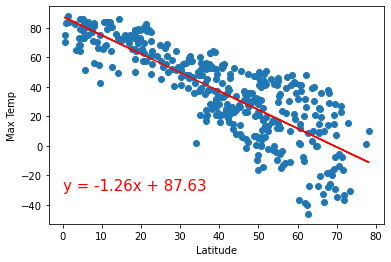

In [15]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp', (0,-30))

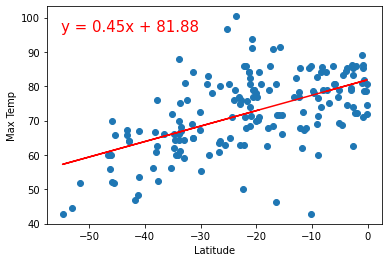

In [16]:
# Linear regression for the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp', (-55, 96))

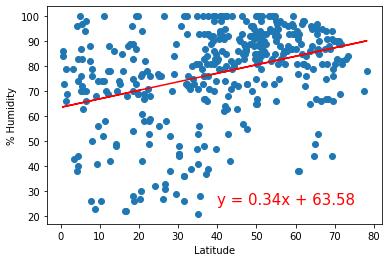

In [32]:
# Linear regression on the Northern Hemisphere for Latitude and Humidity.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity', (40,25))

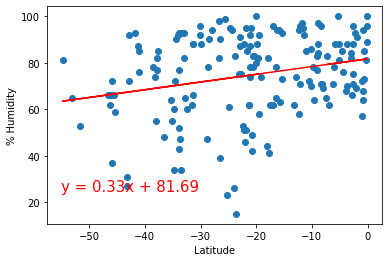

In [18]:
# Linear regression on the Southern Hemisphere for Latitude and Humidity.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-55, 25))

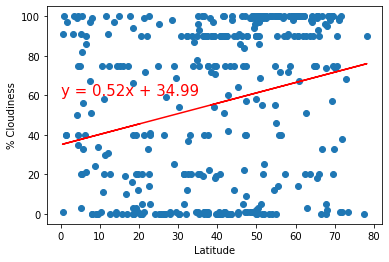

In [19]:
# Linear Regression on the Northern Hemisphere for Cloudiness and Latitudes.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (0, 60))

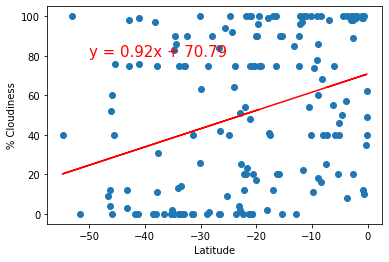

In [20]:
# Linear Regression on the Southern Hemisphere for Cloudiness and Latitudes.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-50, 80))

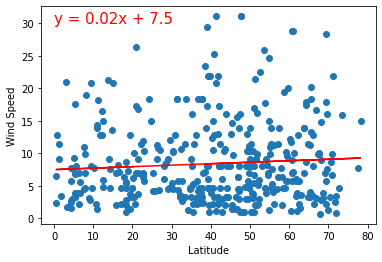

In [28]:
# Linear regression on the Northern Hemisphere for Wind Speed and Latitudes.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,30))

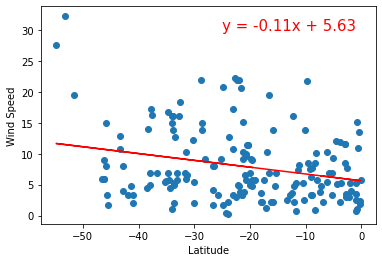

In [24]:
# Linear regression on the Southern Hemisphere for Wind Speed and Latitudes.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the funstion.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-25, 30))